<a href="https://colab.research.google.com/github/VettoriKev/Machine-Learning/blob/main/Vettori_TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo practico N°3
## Ejercicio 1

Primero generamos los dataset con su centro y covarianza.

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C1 = np.array([-1,-1])
C2 = np.array([2,2])

std1 , std2 = 1.6, 1.8 
N1 = 50 ; N2 = 50
 
A_val = C1 + np.random.normal(scale= std1, size=(N1,2))
B_val = C2 + np.random.normal(scale= std2, size=(N2,2))

A_ds = pd.DataFrame(columns=['X','Y','Etiqueta'], index=range(N1))
A_ds['X'], A_ds['Y'] = A_val[:,0] , A_val[:,1]
A_ds['Etiqueta'] = 0
 
B_ds = pd.DataFrame(columns=['X','Y','Etiqueta'], index=range(N2))
B_ds['Etiqueta'] = 1
B_ds['X'], B_ds['Y'] = B_val[:,0], B_val[:,1]

Comb_ds = pd.concat([A_ds,B_ds])
Comb_ds.sample(10)

X         Y  Etiqueta
29 -0.752065  1.200547         0
21 -1.507605 -2.415377         0
8  -0.968024 -0.702115         1
17  3.224145  1.298095         1
30 -2.632714 -2.650879         0
38 -0.811513  0.366143         0
14 -1.709841 -1.303609         0
22  3.497110  1.539449         1
40  3.245949  3.234569         1
16 -1.033745 -1.081161         0

In [ ]:
Comb_ds.describe()

X           Y    Etiqueta
count  100.000000  100.000000  100.000000
mean     0.454650    0.535574    0.500000
std      2.221889    2.117376    0.502519
min     -4.416638   -4.202541    0.000000
25%     -1.251383   -1.060251    0.000000
50%      0.181460    0.479677    0.500000
75%      2.157387    2.043245    1.000000
max      5.357681    5.637857    1.000000

---
##Ploteamos ambos, diferenciados por un color

---

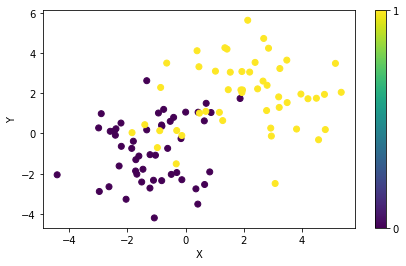

In [ ]:
 plt.figure(figsize=(7, 4))
plt.scatter(Comb_ds.X, Comb_ds.Y, c= [Comb_ds.Etiqueta])
plt.colorbar(ticks=[0, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

---
## Importamos la libreria y asignamos las dos Eliptics, para los distintos tipos

---

In [ ]:
from sklearn.covariance import EllipticEnvelope
import seaborn as sns

clf1 = EllipticEnvelope()
clf2 = EllipticEnvelope()
clf1.fit(Comb_ds.values[Comb_ds.Etiqueta==0,:2])
clf2.fit(Comb_ds.values[Comb_ds.Etiqueta==1,:2])


EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
                 store_precision=True, support_fraction=None)

---
## Ploteamos las elipces correspondientes para notar las muestras que se pueden encontrar fuera de estas

---

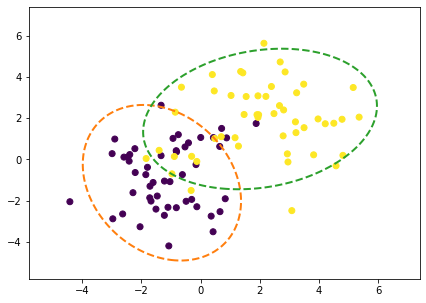

In [ ]:

# Dibujo las elipses
x_min, x_max = (np.min([C1[0]-3*std1, C2[0]-3*std2]), np.max([C1[0]+3*std1, C2[0]+3*std2]))
y_min, y_max = (np.min([C1[1]-3*std1, C2[1]-3*std2]), np.max([C1[1]+3*std1, C2[1]+3*std2]))

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Z1 = clf1.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)
Z2 = clf2.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)

plt.figure(figsize=(7,5))
plt.scatter(Comb_ds.X, Comb_ds.Y, c= [Comb_ds.Etiqueta])
plt.contour(xx, yy, Z1, levels=[0], linewidths=2, colors='tab:orange', linestyles='dashed')
plt.contour(xx, yy, Z2, levels=[0], linewidths=2, colors='tab:green', linestyles='dashed')
plt.show()

---
## importamos librerias para el calulo de los "k-Vecinos" , para dividir el dataset en muestras para entrenar, y para el calculo de algunos parametros.

---


In [ ]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
from matplotlib.colors import ListedColormap 

k = 10

x_train, x_test, y_train, y_test = train_test_split(Comb_ds.values[:,:2], Comb_ds.Etiqueta, test_size=0.5)

knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

---
## Mostrando finalmente los resultados

---

Accuracy: 0.88
Recall: 0.8696
Precision: 0.8696
F1 score: 0.8696 

K : 10 



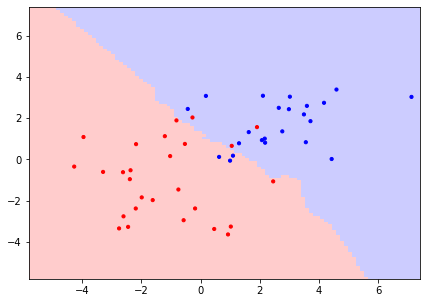

In [ ]:
y_pred = knn.predict(x_test)

# Calculo de las métricas
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))
print('Recall:', np.round(recall_score(y_test, y_pred), 4))
print('Precision:', np.round(precision_score(y_test, y_pred), 4))
print('F1 score:', np.round(f1_score(y_test, y_pred), 4), '\n')
print('K :', k, '\n')

# Grafico las regiones de decisión y los datos de validación
plt.figure(figsize=(7,5))

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFCCCC', '#CCFFCC', '#CCCCFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=cmap_bold, s=10)
plt.show()

---
## Probamos con distintos valores de "k" 

---

Accuracy: 0.96
Recall: 1.0
Precision: 0.92
F1 score: 0.9583 

K : 20 



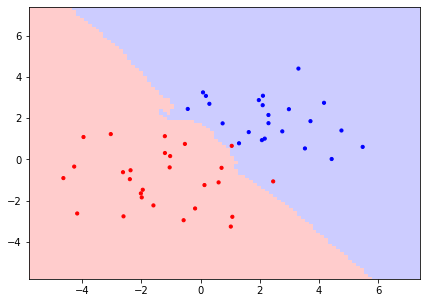

In [ ]:
y_pred = knn.predict(x_test) 

# Calculo de las métricas
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))
print('Recall:', np.round(recall_score(y_test, y_pred), 4))
print('Precision:', np.round(precision_score(y_test, y_pred), 4))
print('F1 score:', np.round(f1_score(y_test, y_pred), 4), '\n')
print('K :', k, '\n')

# Grafico las regiones de decisión y los datos de validación
plt.figure(figsize=(7,5))

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFCCCC', '#CCFFCC', '#CCCCFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=cmap_bold, s=10)

Accuracy: 0.96
Recall: 1.0
Precision: 0.931
F1 score: 0.9643 

K : 3 



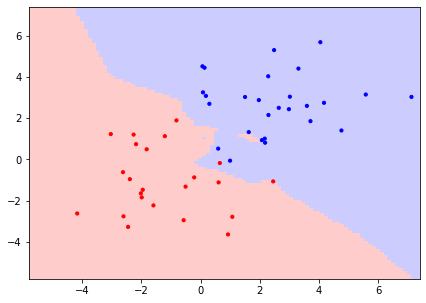

In [ ]:
y_pred = knn.predict(x_test)

# Calculo de las métricas
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))
print('Recall:', np.round(recall_score(y_test, y_pred), 4))
print('Precision:', np.round(precision_score(y_test, y_pred), 4))
print('F1 score:', np.round(f1_score(y_test, y_pred), 4), '\n')
print('K :', k, '\n')

# Grafico las regiones de decisión y los datos de validación
plt.figure(figsize=(7,5))

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFCCCC', '#CCFFCC', '#CCCCFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=cmap_bold, s=10)

Accuracy: 0.894
Recall: 0.8976
Precision: 0.8941
F1 score: 0.8959 

K : 100
N : 1000 



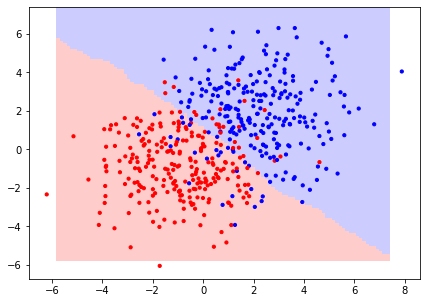

In [ ]:
y_pred = knn.predict(x_test)

# Calculo de las métricas
print('Accuracy:', np.round(accuracy_score(y_test, y_pred), 4))
print('Recall:', np.round(recall_score(y_test, y_pred), 4))
print('Precision:', np.round(precision_score(y_test, y_pred), 4))
print('F1 score:', np.round(f1_score(y_test, y_pred), 4), '\n')
print('K :', k)
print('N :', N1+N2, '\n')

# Grafico las regiones de decisión y los datos de validación
plt.figure(figsize=(7,5))

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFCCCC', '#CCFFCC', '#CCCCFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=cmap_bold, s=10)

---
### Vamos viendo que cambiando los parametros, ya sea con la cantidad de puntos del dataset, o la norma de "K" vecinos para realizar el test. Podemos tener distintos resultados, lo que nos deja pensando en como elegir estos parametros a la hora de una clasificación real y si hay un optimo.


---
---
---

---
# Ejercicio 3.3

Empezamos leyendo el dataset proporcionado por la catedra


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

attributes_spotify = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")

# Vemos algunas muestras
attributes_spotify.sample(10)

Unnamed: 0  ...              artist
1278        1278  ...   Sidewalk Prophets
1417        1417  ...           Meek Mill
1899        1899  ...  Crash Test Dummies
1012        1012  ...             Stormzy
40            40  ...          Disclosure
509          509  ...      After The Fire
2014        2014  ...            Rain Man
1314        1314  ...     Shotgun Surgeon
990          990  ...        Beastie Boys
1290        1290  ...             Passion

[10 rows x 17 columns]

In [ ]:
# Y sus atributos
attributes_spotify.describe()

Unnamed: 0  acousticness  ...      valence       target
count  2017.000000   2017.000000  ...  2017.000000  2017.000000
mean   1008.000000      0.187590  ...     0.496815     0.505702
std     582.402066      0.259989  ...     0.247195     0.500091
min       0.000000      0.000003  ...     0.034800     0.000000
25%     504.000000      0.009630  ...     0.295000     0.000000
50%    1008.000000      0.063300  ...     0.492000     1.000000
75%    1512.000000      0.265000  ...     0.691000     1.000000
max    2016.000000      0.995000  ...     0.992000     1.000000

[8 rows x 15 columns]

### Al principio estaria uno estaria tentado a ver si algunas estadisticas guardan cierta correlación al target que estamos buscando, pero como ya vimos en practicos anteriores, estas pueden ser engañosas ademas de no ser el enfoque de esta materia.
---

### No voy a analizar los nombres propios, si bien puede encontrarse una relación entre el largo del titulo de la canción o como se configura el nombre del artista. Estos pueden ser sesgos mas personales y pueden influir en el target de otra forma. 
Por ejemplo si se trata una canción de tu artista favorito es probable que le pongas un "like" antes de escucharla.

In [ ]:
DS = attributes_spotify
DS = DS.drop(labels=['Unnamed: 0', 'song_title', 'artist'], axis=1)
DS.head()

acousticness  danceability  duration_ms  ...  time_signature  valence  target
0        0.0102         0.833       204600  ...             4.0    0.286       1
1        0.1990         0.743       326933  ...             4.0    0.588       1
2        0.0344         0.838       185707  ...             4.0    0.173       1
3        0.6040         0.494       199413  ...             4.0    0.230       1
4        0.1800         0.678       392893  ...             4.0    0.904       1

[5 rows x 14 columns]

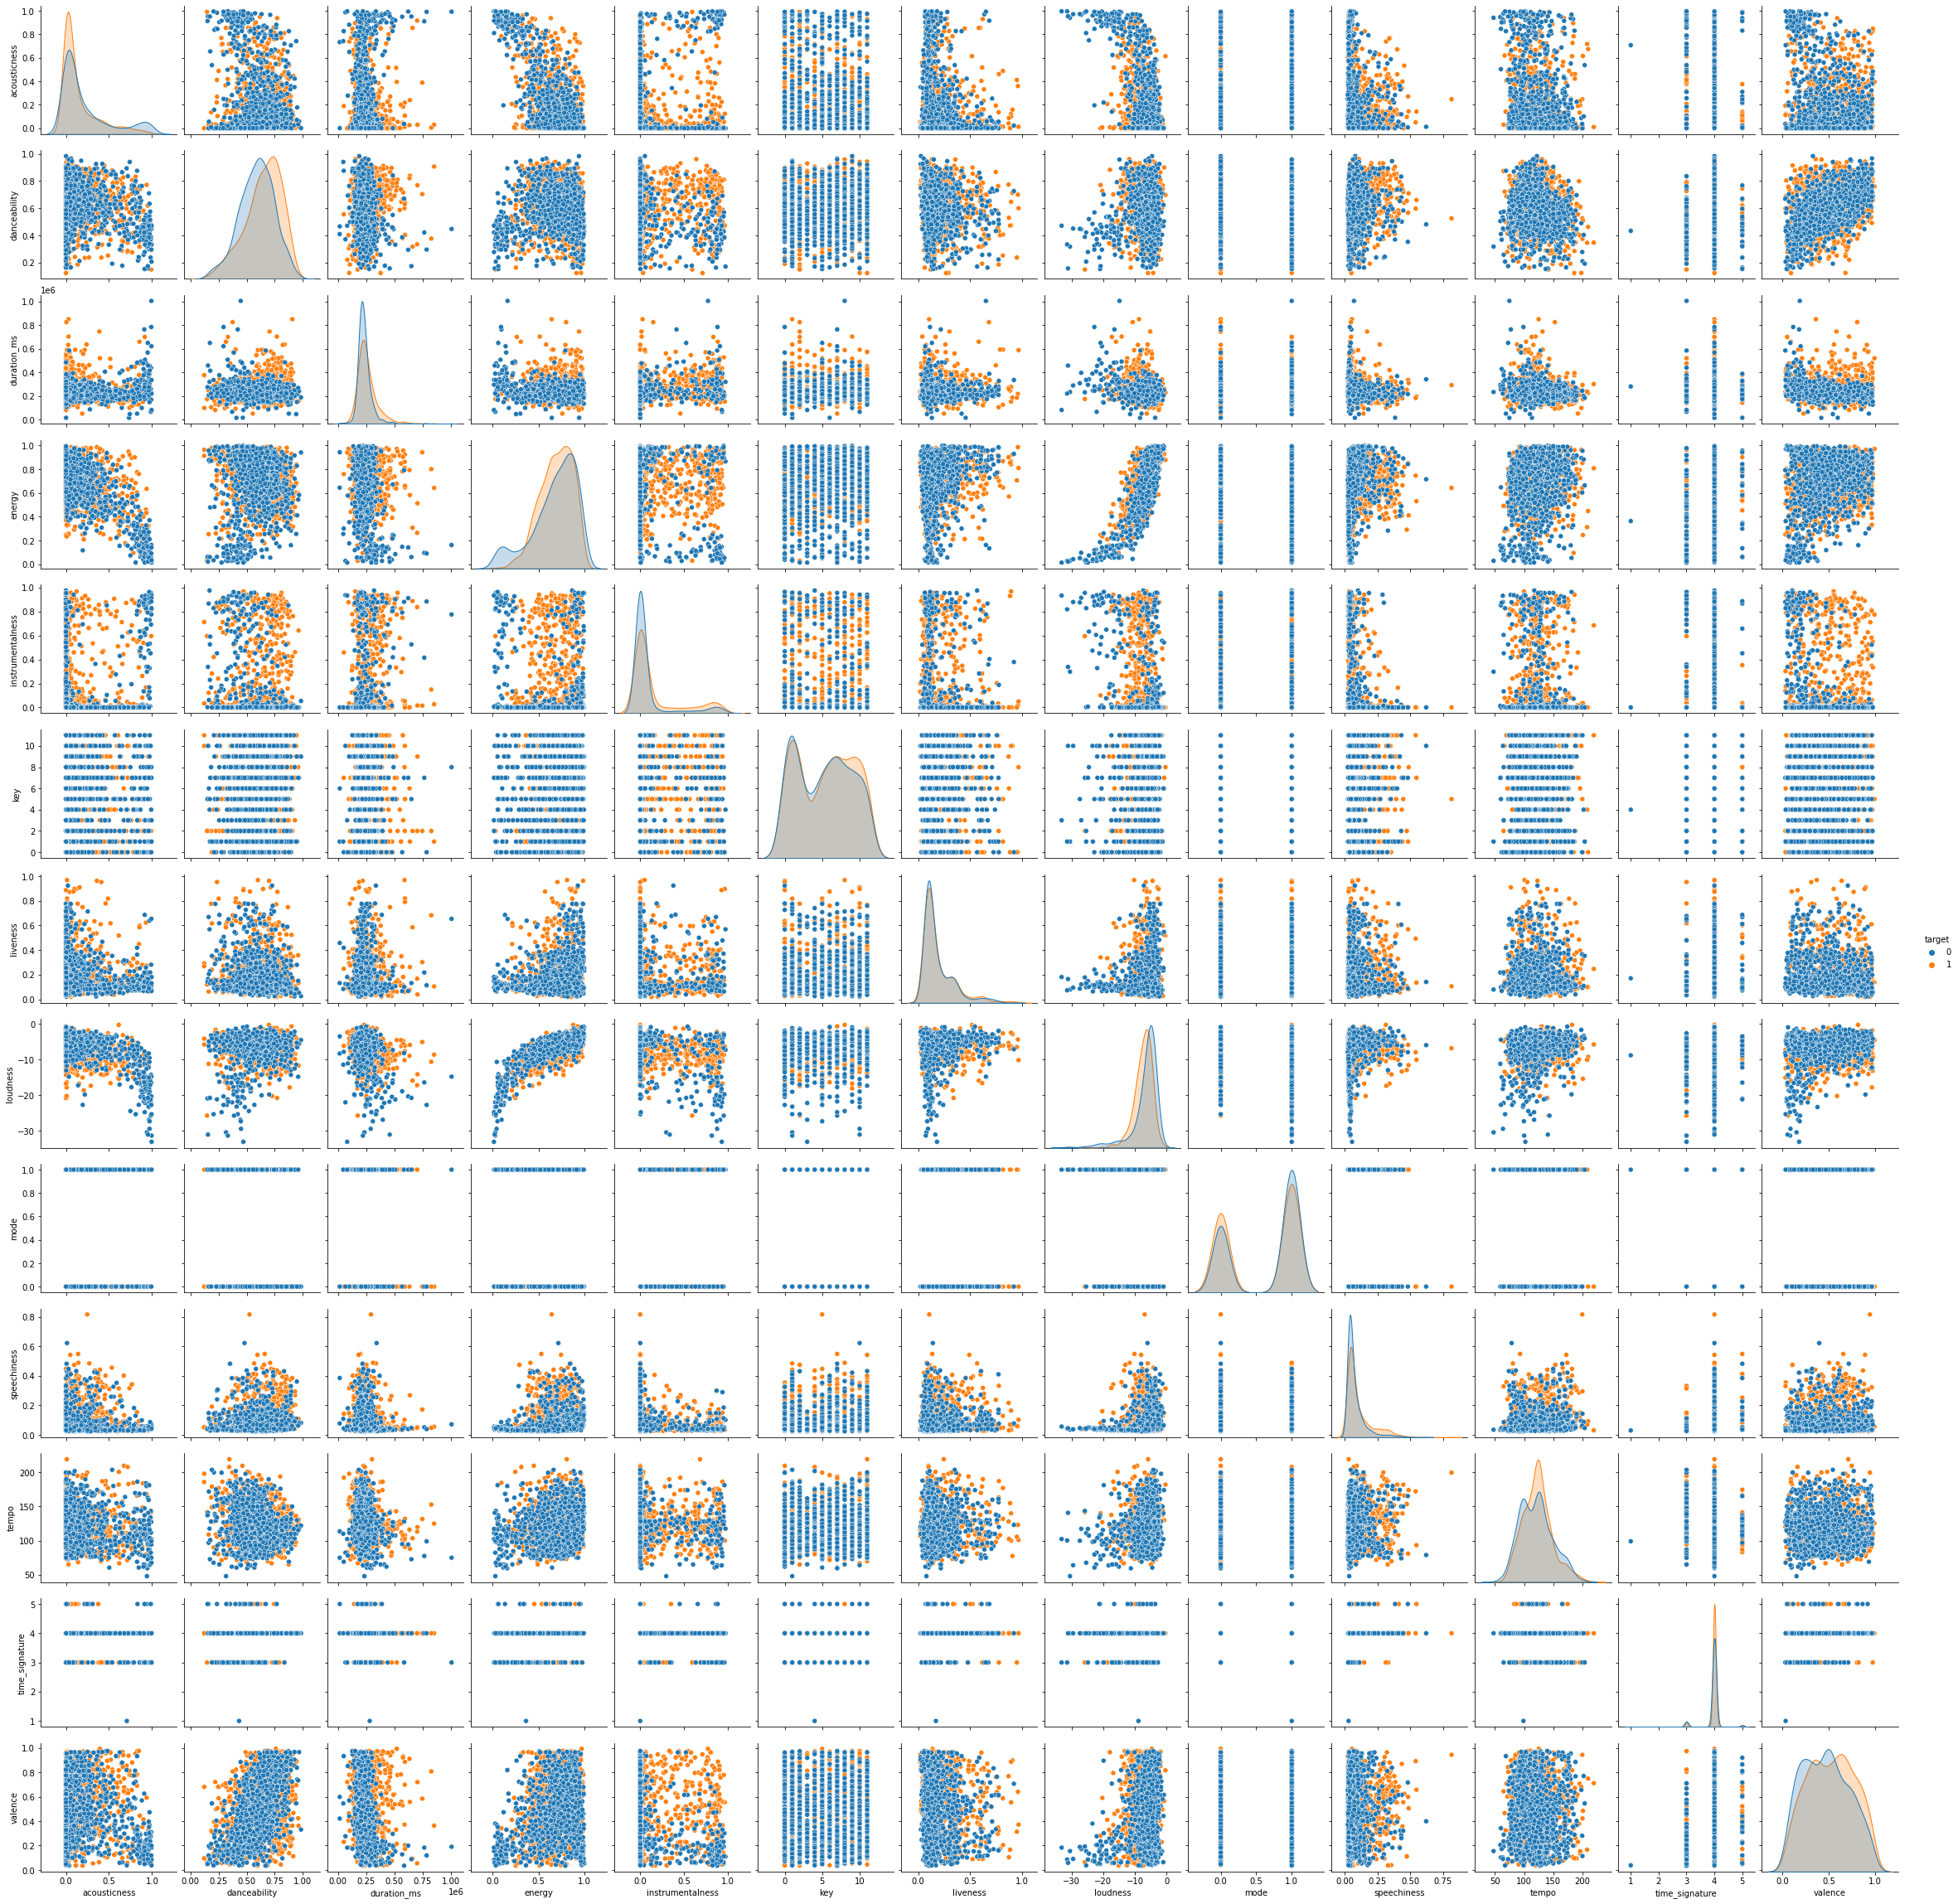

In [ ]:
sns.pairplot(DS, hue='target')

---
---

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,plot_confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import  StandardScaler
Sc = StandardScaler()


x = DS[['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']]
y = DS['target']


---
### Primero pruebo realizar el test con valores supuestos

In [ ]:
K = np.sqrt(DS.size)/2
t_sz = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=t_sz, random_state = 0)

# Estandariza los valores
x_train = Sc.fit_transform(x_train)
x_test = Sc.fit_transform(x_test)

# Entrenando
knn = neighbors.KNeighborsClassifier(n_neighbors = int(K), metric = 'minkowski', p=2) #con metric = 'minkowski'  y P = 2 ==> distancia euclidiana estandar
knn.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=84, p=2,
                     weights='uniform')

Accuracy: 65.18
Recall: 44.3
Precision: 77.27
F1 score: 56.31 

[[259  40]
 [171 136]]


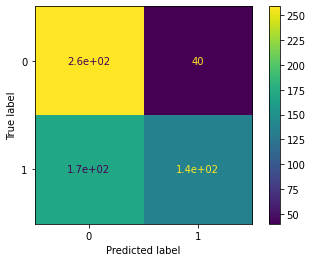

In [ ]:
y_pred = knn.predict(x_test)

# Calculo de las métricas
print('Accuracy:', np.round(accuracy_score(y_test, y_pred)*100, 2))
print('Recall:', np.round(recall_score(y_test, y_pred)*100, 2))
print('Precision:', np.round(precision_score(y_test, y_pred)*100, 2))
print('F1 score:', np.round(f1_score(y_test, y_pred)*100, 2), '\n')

cm = confusion_matrix(y_test,y_pred)
print(cm)

plot_confusion_matrix(knn, x_test, y_test)  
plt.show()


### Ahora hago uso de la libreria de gridsearch para encontrar los parametros con mejores resultados.

In [ ]:

grid_param = {'n_neighbors': [K for K in range(1, int(np.sqrt(DS.size)))],'p': [p for p in range(1, 4)]}

knn_grid = GridSearchCV(knn, grid_param, cv=10)

knn_grid.fit(x_train,y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=84, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'p': [1, 2, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(knn_grid.best_score_)
print(knn_grid.best_params_)

0.7266923684050756
{'n_neighbors': 13, 'p': 1}


Accuracy: 69.97
Recall: 57.65
Precision: 77.29
F1 score: 66.04 

[[247  52]
 [130 177]]


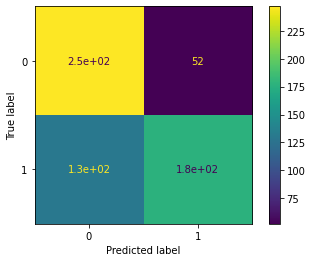

In [ ]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 13, metric = 'minkowski', p=1) 
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)

# Calculo de las métricas
print('Accuracy:', np.round(accuracy_score(y_test, y_pred)*100, 2))
print('Recall:', np.round(recall_score(y_test, y_pred)*100, 2))
print('Precision:', np.round(precision_score(y_test, y_pred)*100, 2))
print('F1 score:', np.round(f1_score(y_test, y_pred)*100, 2), '\n')

cm = confusion_matrix(y_test,y_pred)
print(cm)

plot_confusion_matrix(knn, x_test, y_test)  
plt.show()


##